In [1]:
import pandas as pd

In [3]:
df= pd.read_csv('/Users/morgan/Desktop/SEIS 763 ML/ML_job_postings_finale_ready_v2.csv',header=0)
df.head()

,job_id,title,work_type,description,location,zip_code,min_salary,max_salary,normalized_salary,views,...,sector,city,state,name,latitude,longitude,gdp,income,region,moving_score
0,1014822088,Marketing Specialist,FULL_TIME,About TrackerTracker is a leading global cloud...,United States,NaN,70000.0,80000.0,75000.0,7.0,...,Information Technology,United States,US,Remote,NaN,NaN,483162.0,416325.0,Plains,50.000000
1,3189117072,Client Service Associate / Practice Manager,FULL_TIME,Company OverviewSignature Estate and Investmen...,"Redondo Beach, CA",90277.0,70000.0,100000.0,85000.0,6.0,...,Energy,Redondo Beach,CA,California,36.778261,-119.417932,3870379.0,3166135.0,Far West,4.214518
2,3260455681,Operations Specialist,FULL_TIME,Weyerhaeuser is searching for a Operations Spe...,"Castle Rock, WA",98611.0,72742.0,109113.0,90927.5,18.0,...,Materials,Castle Rock,WA,Washington,47.751074,-120.740139,807865.0,632296.0,Far West,4.703287
3,3277232283,HR & Administrative Assistant,FULL_TIME,HR & Administrative CoordinatorWork is Remote ...,United States,NaN,55000.0,72000.0,63500.0,59.0,...,Energy,United States,US,Remote,NaN,NaN,483162.0,416325.0,Plains,50.000000
4,3297645846,Contract Administrator,FULL_TIME,Contract AdministratorSummary of PositionThe C...,"Broomfield, CO",80020.0,74400.0,90000.0,82200.0,6.0,...,Materials,Broomfield,CO,Colorado,39.550051,-105.782067,529627.0,470606.0,Rocky Mountain,8.368978


In [5]:
df.shape

(3902, 50)

In [98]:
reg_df=df[['normalized_salary','day_posting','degree_level','programming_languages_score',
       'analysis_statistics_score', 'machine_learning_score',
       'data_visualization_score', 'cloud_platform_score', 'database_score',
       'big_data_tools_score', 'big_data_score','company_size','follower_count', 'gdp', 'moving_score','job_classification']]

In [100]:
reg_df.describe()

,normalized_salary,day_posting,programming_languages_score,analysis_statistics_score,machine_learning_score,data_visualization_score,cloud_platform_score,database_score,big_data_tools_score,big_data_score,company_size,follower_count,gdp,moving_score
count,3.902000e+03,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.0,3902.000000,3803.000000,3.902000e+03,3.902000e+03,3902.000000
mean,1.464125e+05,38.613532,1.407996,1.158124,1.074065,1.165812,0.405177,0.501794,0.0,0.070477,5.251906,1.812468e+06,1.485876e+06,16.057535
std,1.640213e+06,33.183036,0.901801,1.076114,0.465579,0.545711,0.629615,0.897958,0.0,0.393363,1.990553,5.685063e+06,1.306463e+06,17.803008
min,2.000050e+04,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000e+00,4.353400e+04,1.583467
25%,8.005006e+04,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,4.000000,1.753675e+04,4.831620e+05,4.703287
50%,1.108235e+05,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,6.000000,1.258030e+05,8.066650e+05,6.523601
75%,1.460000e+05,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,7.000000,5.693270e+05,2.172010e+06,17.304814
max,1.025000e+08,191.000000,7.000000,9.000000,8.000000,5.000000,4.000000,6.000000,0.0,5.000000,7.000000,3.270284e+07,3.870379e+06,50.000000


In [102]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso,lasso_path

In [104]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score, KFold

In [106]:
# objective: predict normalized_salary using numerical variables and 1 dummy

In [133]:
df['day_posting'].unique()

array([ 30, 179, 180, 190,  29,  31,  55, 188, 181,  54,  34,  32,  46,
        39,  33,  35, 191,  41,  36,  37,  44,  40,  45,  59,  42,  60,
        13,  51,  38,  48,  47,  53])

In [109]:
df['job_classification'].unique()

array(['Engineering', 'Other', 'Business'], dtype=object)

In [111]:
#define IVs and DV

X=reg_df.drop('normalized_salary',axis=1)
y=reg_df['normalized_salary']

In [113]:
# convert categorical varibles into dummy varibles
X = pd.get_dummies(X, drop_first=True)
X.head()

,day_posting,programming_languages_score,analysis_statistics_score,machine_learning_score,data_visualization_score,cloud_platform_score,database_score,big_data_tools_score,big_data_score,company_size,follower_count,gdp,moving_score,"degree_level_bachelor, postgraduate",degree_level_postgraduate,job_classification_Engineering,job_classification_Other
0,30,1,0,1,1,1,0,0,0,2.0,5046,483162.0,50.000000,False,False,True,False
1,30,1,0,1,1,1,1,0,0,2.0,4650,3870379.0,4.214518,False,False,True,False
2,179,1,1,1,1,1,0,0,0,7.0,92381,807865.0,4.703287,False,False,True,False
3,30,1,1,1,1,1,1,0,0,NaN,1058,483162.0,50.000000,False,False,False,True
4,179,1,1,1,2,0,0,0,0,5.0,554,529627.0,8.368978,False,False,True,False


In [115]:
#X.isnull().sum()

In [117]:
# Calculate the mean of the column
column_mean = X['company_size'].mean()

# Fill missing values with the mean
X['company_size'].fillna(column_mean, inplace=True)

In [119]:
# standardization
x_scaled=preprocessing.scale(X)

In [121]:
# Train-test split
#80% for training, 20% for testing

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [123]:
# Create the Lasso model with an alpha value (regularization strength)
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha

# Train the model on the training data
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [125]:
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [127]:
# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

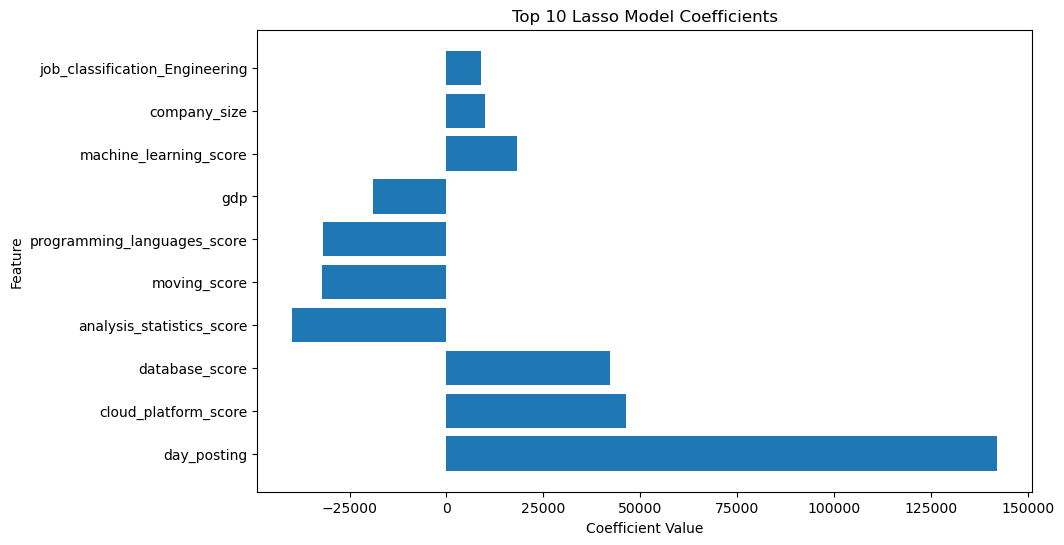

In [131]:
# Get the Lasso coefficients
coefficients = lasso_model.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort coefficients by magnitude for better visualization
top_10_coef = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)[:10]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_10_coef['Feature'], top_10_coef['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Lasso Model Coefficients')
plt.show()

In [131]:
# Step 4: Fit a baseline Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = lr.predict(X_test)

# Step 6: Evaluate the baseline model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Baseline Model Performance:")
print(f"R²: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Baseline Model Performance:
R²: -0.001
Mean Absolute Error (MAE): 108528.29
Mean Squared Error (MSE): 7170301322708.12


In [133]:
coefs=lr.coef_
coefs

array([-1.40997049e+03,  6.88980246e+03, -1.44004564e+03,  2.88864231e+03,
       -5.95882127e+02,  3.21582197e+03,  2.78935767e+02,  4.54747351e-12,
        1.84647410e+03,  5.36009198e+03,  8.20213954e+03, -3.35682552e+02,
        5.36276610e+03,  2.94600140e+03,  9.49540024e+01, -2.20209495e+02])

In [135]:
feature_names = X.columns


# Pair feature names with their coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', ascending=False)

print("Top Features by Coefficient:")
print(feature_importance.head(10))

Top Features by Coefficient:
                                Feature  Coefficient
10                       follower_count  8202.139541
1           programming_languages_score  6889.802460
12                               income  5362.766104
9                          company_size  5360.091980
5                  cloud_platform_score  3215.821974
13                         moving_score  2946.001400
3                machine_learning_score  2888.642313
8                        big_data_score  1846.474103
6                        database_score   278.935767
14  degree_level_bachelor, postgraduate    94.954002


In [137]:
# Step 2.1: Lasso with Cross-Validation
# Define a range of alpha values for regularization strength
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha from cross-validation
best_alpha = lasso_cv.alpha_
print(f"Best alpha selected by LassoCV: {best_alpha:.4f}")

# Step 2.2: Evaluate Lasso on Test Set
y_pred_lasso = lasso_cv.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Model Performance (alpha={best_alpha:.4f}):")
print(f"R²: {r2_lasso:.3f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")

# Step 2.3: Feature Selection using Lasso
lasso_coefficients = lasso_cv.coef_
important_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
}).query('Coefficient != 0').sort_values(by='Coefficient', ascending=False)

print("Selected Features by Lasso:")
print(important_features)

Best alpha selected by LassoCV: 10.0000
Lasso Model Performance (alpha=10.0000):
R²: -0.001
Mean Absolute Error (MAE): 108529.43
Mean Squared Error (MSE): 7170294842937.92
Selected Features by Lasso:
                                Feature  Coefficient
10                       follower_count  8195.158526
1           programming_languages_score  6884.513300
9                          company_size  5351.773666
12                               income  5009.527495
5                  cloud_platform_score  3209.631935
13                         moving_score  2926.395910
3                machine_learning_score  2881.885625
8                        big_data_score  1841.122705
6                        database_score   272.447847
14  degree_level_bachelor, postgraduate    87.299275
15            degree_level_postgraduate  -208.944424
4              data_visualization_score  -585.714953
0                           day_posting -1402.044495
2             analysis_statistics_score -1432.284948


In [147]:
# Step 3: K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with the best alpha
lasso_cv_scores = cross_val_score(Lasso(alpha=best_alpha), x_scaled, y, cv=kf, scoring='r2')

print("K-Fold Cross-Validation Results (R²):")
print(f"Mean R²: {np.mean(lasso_cv_scores):.3f}, Std: {np.std(lasso_cv_scores):.3f}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.678e+14, tolerance: 1.051e+12
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.630e+14, tolerance: 1.051e+12
  model = cd_fast.enet_coordinate_descent(


K-Fold Cross-Validation Results (R²):
Mean R²: -1.278, Std: 0.716


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.616e+13, tolerance: 1.050e+12
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+14, tolerance: 1.050e+12
  model = cd_fast.enet_coordinate_descent(


In [157]:
df.columns

Index(['job_id', 'title', 'work_type', 'description', 'min_salary',
       'max_salary', 'normalized_salary', 'views', 'original_listed_time',
       'expiry', 'day_posting', 'location', 'zip_code', 'is_data_related',
       'formatted_experience_level', 'degree_level', 'job_classification',
       'soft_skills', 'programming_languages_score',
       'analysis_statistics_score', 'machine_learning_score',
       'data_visualization_score', 'cloud_platform_score', 'database_score',
       'big_data_tools_score', 'big_data_score', 'business_engineering_score',
       'company_id', 'company_name', 'company desc', 'company_size', 'country',
       'headquarter state', 'headquarter city', 'headquarter addr',
       'headquarter zipcode', 'industry', 'speciality', 'employee_count',
       'follower_count', 'sector', 'city', 'state', 'name', 'latitude',
       'longitude', 'gdp', 'income', 'region', 'moving_score'],
      dtype='object')

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming X_scaled is your standardized feature matrix
# Add a constant to calculate VIF
X_with_constant = add_constant(x_scaled)

In [179]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = ["Constant"] + list(X_scaled_df.columns)  # Match length correctly
vif_data["VIF"] = [variance_inflation_factor(X_with_constant, i) for i in range(X_with_constant.shape[1])]

# Exclude the constant term's VIF from the results
vif_data = vif_data.iloc[1:].reset_index(drop=True)

# Display results
print(vif_data)

                                Feature         VIF
0                           day_posting    1.100125
1           programming_languages_score    1.314997
2             analysis_statistics_score    1.165820
3                machine_learning_score    1.076835
4              data_visualization_score    1.194964
5                  cloud_platform_score    1.049769
6                        database_score    1.159451
7                  big_data_tools_score         NaN
8                        big_data_score    1.141817
9                          company_size    1.199009
10                       follower_count    1.101650
11                                  gdp  201.530230
12                               income  201.313539
13                         moving_score    1.315807
14  degree_level_bachelor, postgraduate    1.001666
15            degree_level_postgraduate    1.000656


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


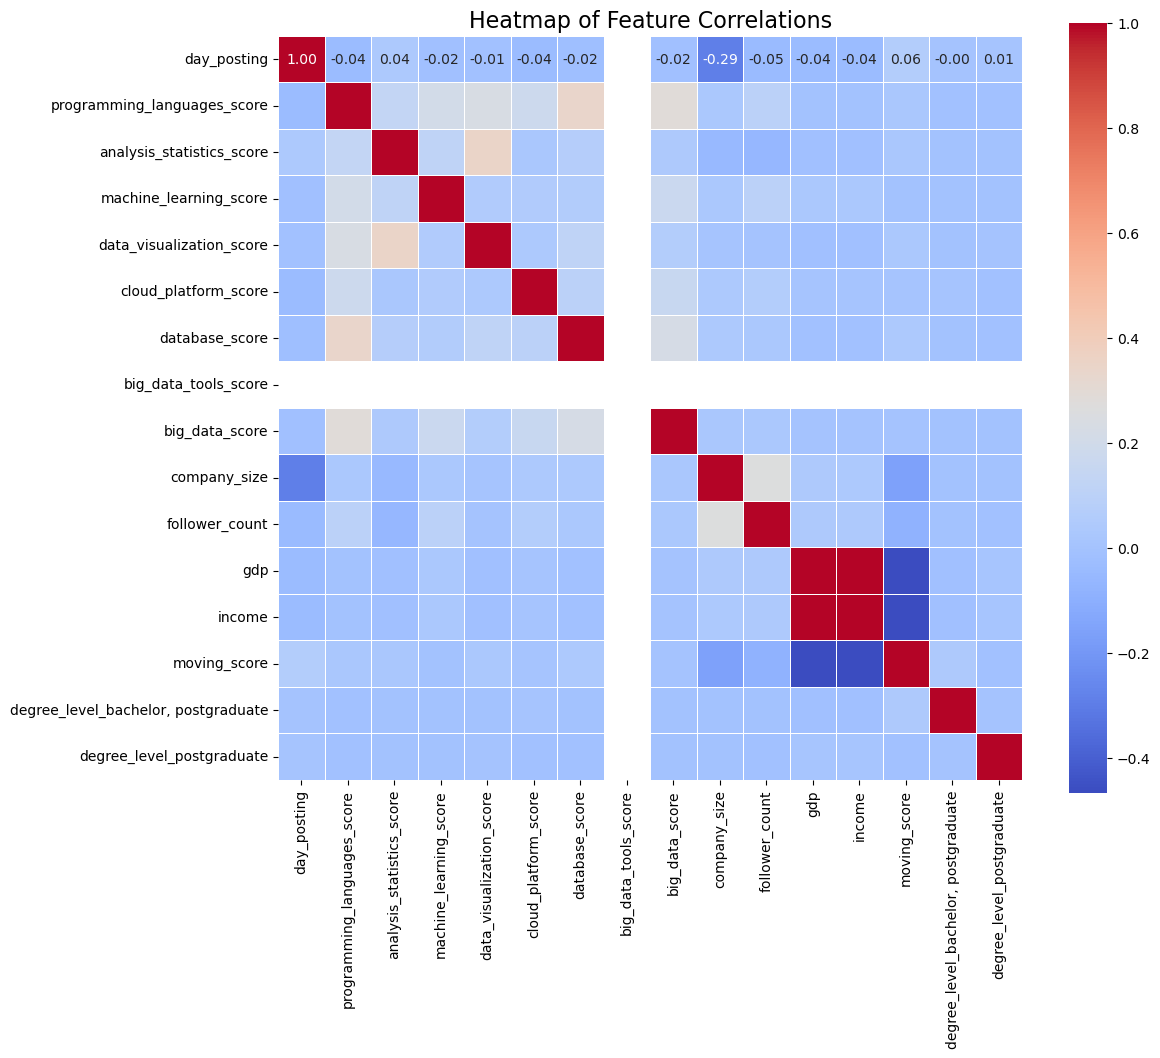

In [173]:
# Assuming X_scaled is the standardized feature matrix
# Convert it back to a DataFrame for better visualization
X_scaled_df = pd.DataFrame(x_scaled, columns=X.columns)

# Compute the correlation matrix
correlation_matrix = X_scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=0.5)
plt.title("Heatmap of Feature Correlations", fontsize=16)
plt.show()